In [1]:
%matplotlib inline
import math
import pandas as pd
from tsmom_model import *
import numpy as np
from datetime import datetime
import math
import statsmodels.api as sm

/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")
/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated since IPython 4.0.You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
import pylab
sns.set(font_scale=2)
pylab.rcParams['figure.figsize'] = (24, 18)

# Hand cleansed
Hand cleaned to removed duplicates

In [3]:
cleansed=load_amihud_markets_price()

tsmom_model.py:158: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  data=pd.read_csv('./Price.csv',index_col=0,parse_dates=['Date']).resample(rule='d',how='last')
tsmom_model.py:160: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  qd=pd.read_csv('./liquid_contracts.csv',index_col=0,parse_dates=['Date']).resample(rule='d',how='last')


# Amihud methodology

Amihud (2002) developed the illiquidity measure expressed by:

$$ Amihud =\frac{1}{N} \sum \frac{|r_t|}{\text{dvol}_t} $$

where $r_t$ is the return on day $t$ and $Volume_t$ is the dollar volume on day $t$. 

The benefit of taking the daily return is to weight the move by change of price and the volume.


In [4]:
amihud=calculate_amihud_liquidity(cleansed)[:'2016'] 

tsmom_model.py:42: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  data=pd.read_csv('./Volume.csv',index_col=0,parse_dates=['Date']).resample(rule='d',how='mean')
tsmom_model.py:44: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  v=pd.read_csv('./volume_data.csv',index_col=0,parse_dates=['Date']).resample(rule='d',how='sum')
tsmom_model.py:46: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(min_periods=100,window=250,center=False).mean()
  volume=pd.rolling_mean(v,250,min_periods=100).resample(rule='d',how='mean')[:'2016']
tsmom_model.py:46: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  volume=pd.rolling_mean(v,250,min_periods=100).resample(rule='d',how='mean')[:'2016']
tsmom_model.py:49: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future ve

In [5]:
FHT=calculate_FHT(cleansed)

tsmom_model.py:283: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).count()
  nonzero=x[x==0].resample(rule='m',how='count')
tsmom_model.py:284: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).count()
  Z=(nonzero/x.resample(rule='m',how='count')).dropna()
tsmom_model.py:285: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  data[c]=pd.Series(norm.cdf((1+Z)/2.),index=Z.index)*2*pd.rolling_std(x,12).resample(rule='m',how='last')
tsmom_model.py:285: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  data[c]=pd.Series(norm.cdf((1+Z)/2.),index=Z.index)*2*pd.rolling_std(x,12).resample(rule='m',how='last')


In [6]:
results=pd.DataFrame()

In [7]:
results['Mean Return']=(cleansed.resample(rule='m',how='last').pct_change().mean()*100).round(2)
results['Annualized Volatility']=(cleansed.resample(
    rule='m',how='last').pct_change().std()*math.sqrt(12)*100).round(2)
results['Skew']=cleansed.resample(rule='m',how='last').pct_change().skew().round(2)
results['Kurtosis']=cleansed.resample(rule='m',how='last').pct_change().kurtosis().round(2)
results['Amihud (x1e12)']=(amihud.median()*1e12).apply(lambda x: '%.3f' % x)
results['FHT (x1e4)']=(FHT.median()*1e4).round(2)

/Users/mrefermat/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  """Entry point for launching an IPython kernel.
/Users/mrefermat/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/mrefermat/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  after removing the cwd from sys.path.
/Users/mrefermat/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:5: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  """


In [8]:
results.sort_index()

,Mean Return,Annualized Volatility,Skew,Kurtosis,Amihud (x1e12),FHT (x1e4)
AEX-AEX INDEX,0.42,21.10,-2.61,20.21,31.179,145.16
AUD,0.11,12.56,-0.31,1.25,10.889,111.10
BMF-ARABICA COFFEE,0.46,31.42,0.58,1.21,9636.933,256.81
BMF-BOVESPA INDEX,2.72,60.97,1.23,15.57,8.047,275.07
BMF-SOYBEAN,1.16,23.16,-0.41,0.68,46489.784,226.41
CAC 40,0.55,16.91,-0.07,-0.04,21.000,203.61
CAD,0.06,8.70,-0.31,2.44,9.565,82.18
CBT-10 YRS US T-NOTE COMP.,0.11,6.57,1.38,23.15,0.122,51.42
CBT-2 YEAR US T-NOTE COMP.,0.02,1.80,-1.00,8.35,0.227,12.24
CBT-30 YR US T-BOND COMP,0.14,11.54,-0.01,3.38,0.590,84.01


In [9]:
print results.sort_index().to_latex()

\begin{tabular}{lrrrrlr}
\toprule
{} &  Mean Return &  Annualized Volatility &   Skew &  Kurtosis & Amihud (x1e12) &  FHT (x1e4) \\
\midrule
AEX-AEX INDEX                &         0.42 &                  21.10 &  -2.61 &     20.21 &         31.179 &      145.16 \\
AUD                          &         0.11 &                  12.56 &  -0.31 &      1.25 &         10.889 &      111.10 \\
BMF-ARABICA COFFEE           &         0.46 &                  31.42 &   0.58 &      1.21 &       9636.933 &      256.81 \\
BMF-BOVESPA INDEX            &         2.72 &                  60.97 &   1.23 &     15.57 &          8.047 &      275.07 \\
BMF-SOYBEAN                  &         1.16 &                  23.16 &  -0.41 &      0.68 &      46489.784 &      226.41 \\
CAC 40                       &         0.55 &                  16.91 &  -0.07 &     -0.04 &         21.000 &      203.61 \\
CAD                          &         0.06 &                   8.70 &  -0.31 &      2.44 &          9.565 &       

In [34]:
res=pd.DataFrame()
d_map=sector_map(amihud)
mu=pd.Series()
sd=pd.Series()
for s in d_map.keys():
    mu[s]=amihud[d_map[s]].mean().mean()*1e7
    sd[s]=amihud[d_map[s]].std().mean()*1e7
res['Amihud Mean']=mu
res['Amihud STD']=sd    

mu=pd.Series()
sd=pd.Series()
for s in d_map.keys():
    mu[s]=FHT[d_map[s]].mean().mean()
    sd[s]=FHT[d_map[s]].std().mean()
res['FHT Mean']=mu
res['FHT STD']=sd   

In [37]:
print res.T.round(3).to_latex()

\begin{tabular}{lrrrrrr}
\toprule
{} &  Agriculturals &  Currencies &  Energies &  Equities &  Metals &  Fixed Income \\
\midrule
Amihud Mean &          3.047 &       0.002 &     9.777 &     3.708 &   1.158 &         0.002 \\
Amihud STD  &          7.167 &       0.004 &    27.853 &    13.972 &   1.579 &         0.020 \\
FHT Mean    &          0.038 &       0.020 &     0.048 &     0.029 &   0.030 &         0.005 \\
FHT STD     &          0.043 &       0.020 &     0.063 &     0.033 &   0.044 &         0.005 \\
\bottomrule
\end{tabular}



In [36]:
FHT[d_map[s]].mean().mean()

0.004570644208077789

In [33]:
res.round(3)

,Amihud Mean,Amihud STD,FHT Mean,FHT STD
Agriculturals,3.047,7.167,0.038,0.043
Currencies,0.002,0.004,0.020,0.020
Energies,9.777,27.853,0.048,0.063
Equities,3.708,13.972,0.029,0.033
Metals,1.158,1.579,0.030,0.044
Fixed Income,0.002,0.020,0.005,0.005


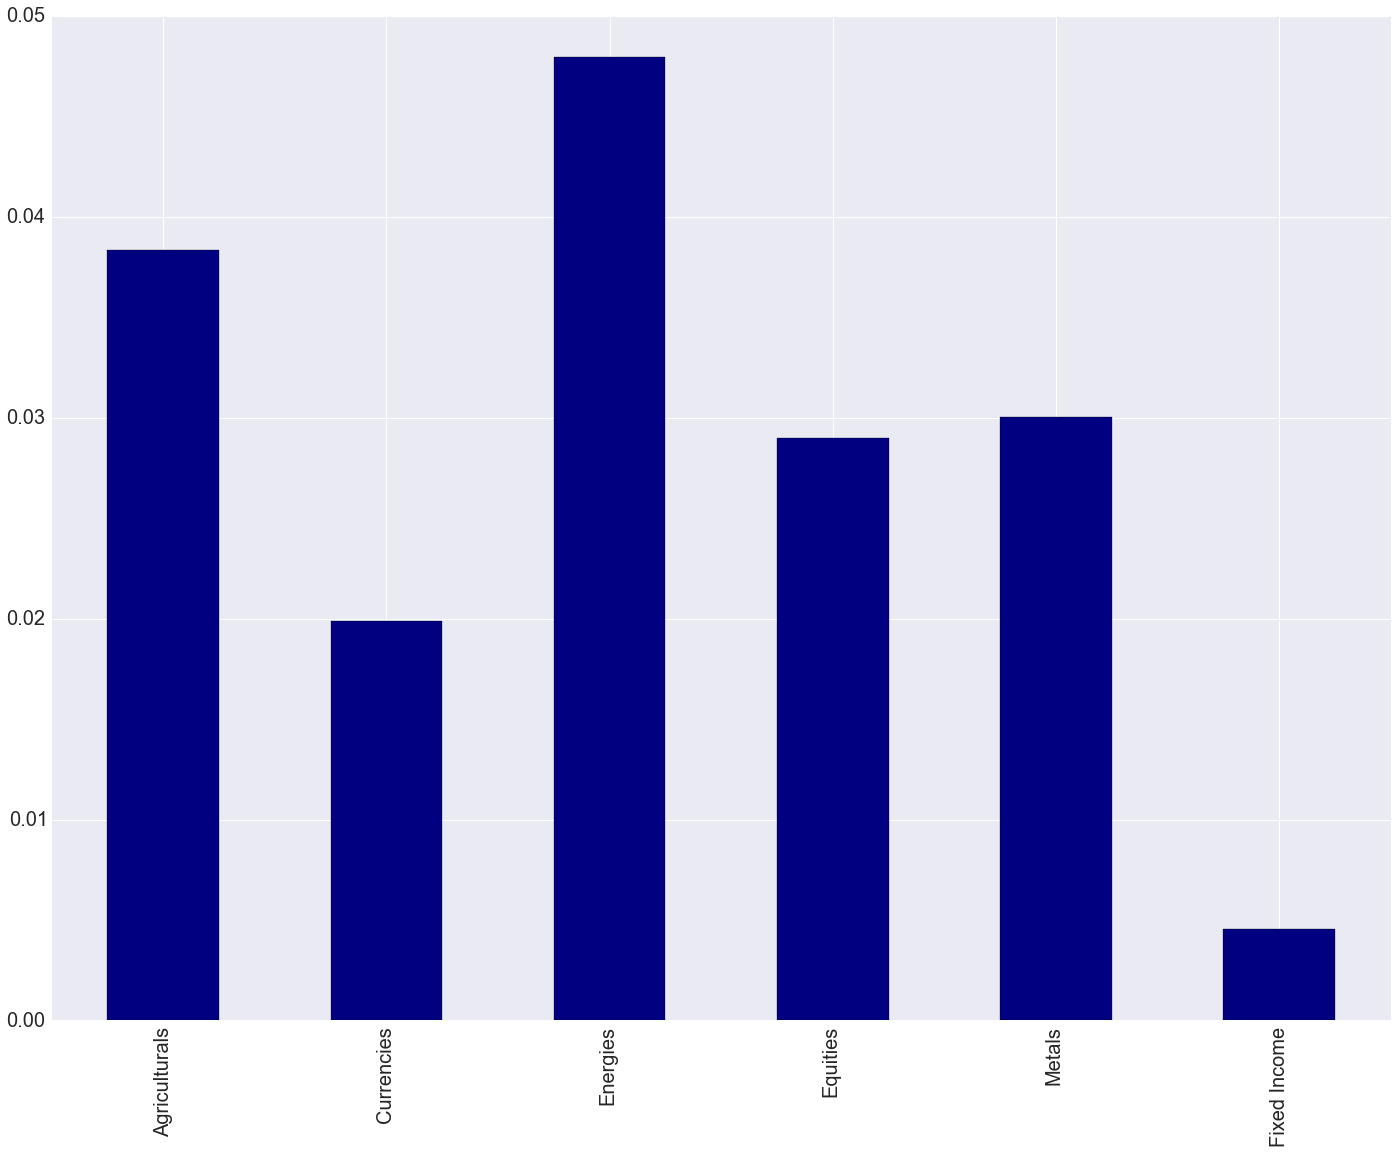

In [17]:
mu.plot(kind='bar',colormap='jet')

In [14]:
s='Energies'

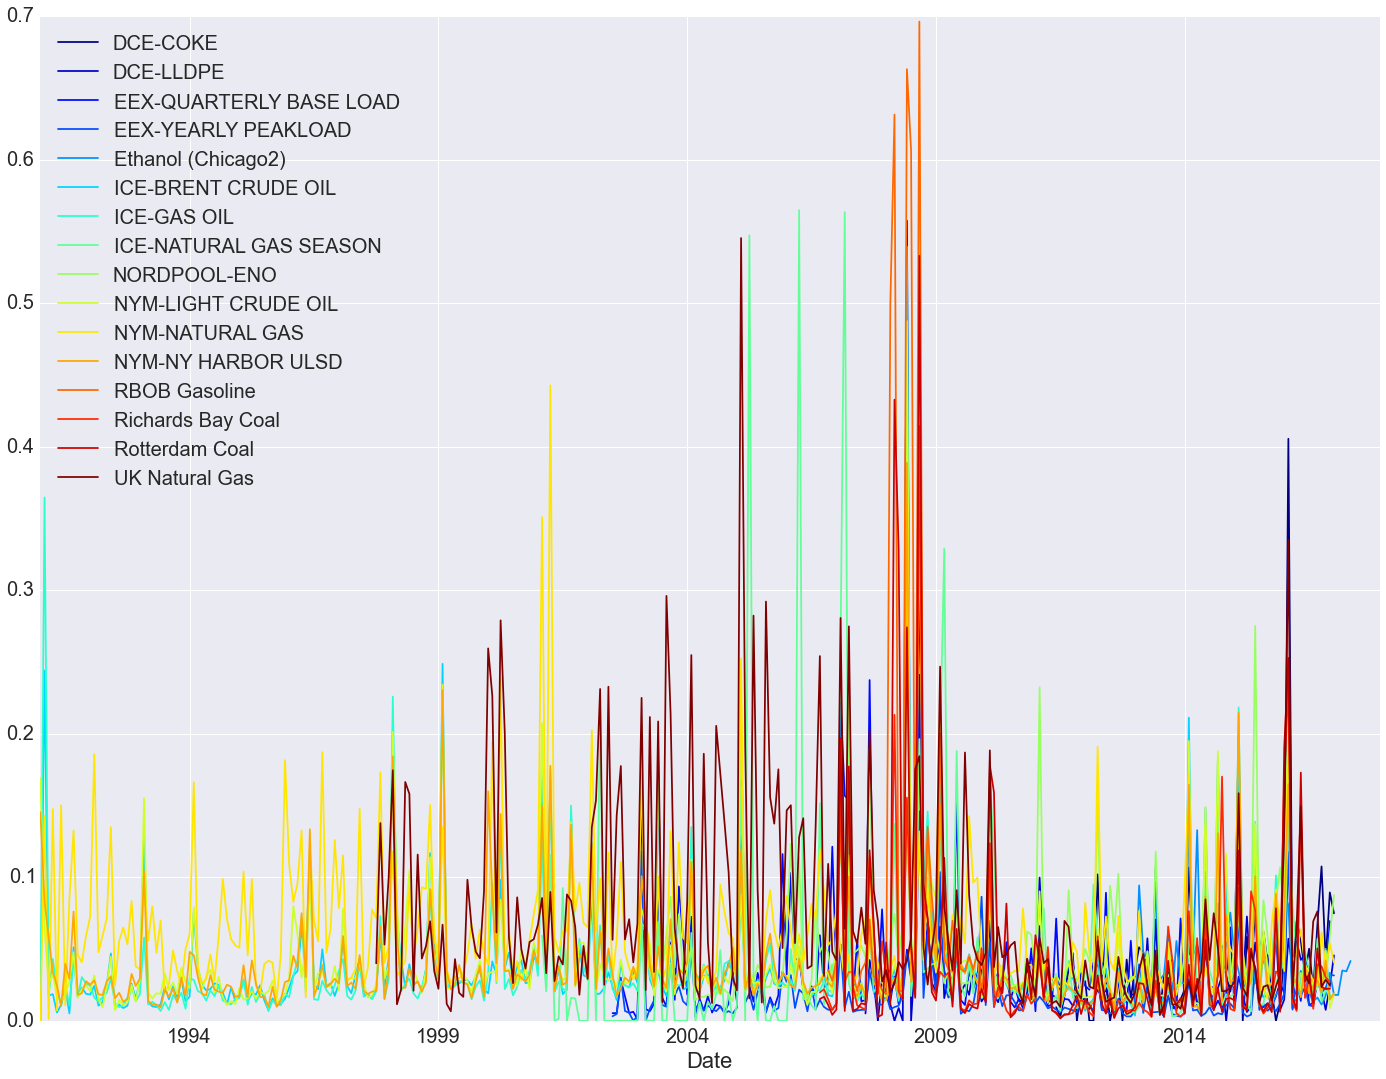

In [18]:
FHT[d_map[s]].plot(colormap='jet')

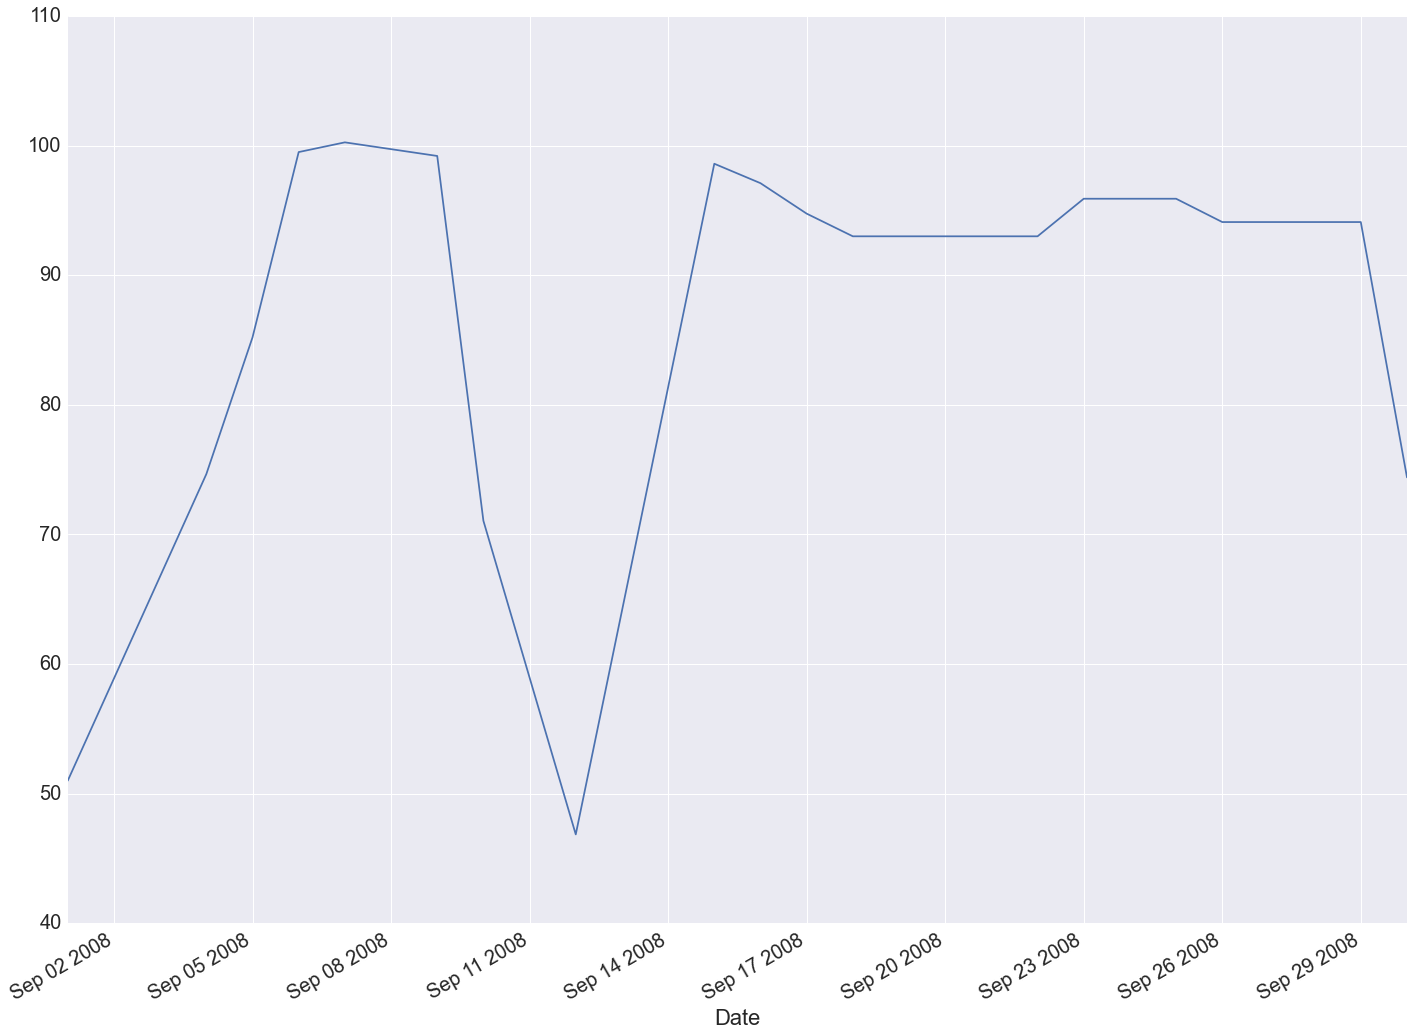

In [16]:
cleansed['ICE-NATURAL GAS SEASON']['2008-9'].dropna().plot()